# MODELING - FURNACE C

In [9]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import numpy as np 
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from xgboost import XGBRegressor
from scipy.optimize import dual_annealing
import pickle
from statsmodels.tsa.stattools import adfuller
from sklearn.model_selection import TimeSeriesSplit
from tqdm import tqdm

In [10]:
# READ IN DATA
df_c = pd.read_csv('../../historical/data/clean_furnace_pre_c.csv', index_col = 'Date')
df_c.index = pd.to_datetime(df_c.index)

def split_data(df, perc_split):
    return np.split(df, [int(perc_split *len(df))])

def split_test_data(test_df, perc_split):
    return np.split(test_df, [int(perc_split *len(test_df))])

train_dfc, dum_dfc = split_data(df_c, 0.8)
val_dfc, test_dfc = split_test_data(dum_dfc, 0.5)

def split_x_y(df):
    df_y = df.loc[:, 'OUTLET']
    df_x = df.loc[:, df.columns != 'OUTLET']
    return df_x, df_y

train_dfc_x, train_dfc_y = split_x_y(train_dfc)
val_dfc_x, val_dfc_y = split_x_y(val_dfc)
test_dfc_x, val_dfc_y = split_x_y(test_dfc)

In [11]:
def cross_val_model(df, model):
    rmse = []
    mape = []
    for train_index, test_index in tscv.split(df):
        cv_train, cv_test = df.iloc[train_index], df.iloc[test_index]
        cv_train_x, cv_train_y = split_x_y(cv_train)
        cv_test_x, cv_test_y = split_x_y(cv_test)
        model = model
        model.fit(cv_train_x, cv_train_y)
        predictions = model.predict(cv_test_x)
        preds_df = pd.DataFrame({'preds' : predictions})
        preds_df.index = cv_test_y.index
        true_values = cv_test_y
        rmse.append(mean_squared_error(true_values, predictions, squared = False))    
        mape.append(round(mean_absolute_percentage_error(true_values, predictions) * 100, 3))
        plt.plot(true_values, label = 'Actual');
        plt.plot(preds_df, label = 'Predicted');
        plt.xticks(rotation=90);
        plt.legend();
        plt.show();
        print("RMSE:", round(mean_squared_error(true_values, predictions, squared = False),3))
        print("MAPE:", round(mean_absolute_percentage_error(true_values, predictions) * 100, 3))
        
    print('Average RMSE:', round(sum(rmse)/len(rmse),3))
    print('Average MAPE:', round(sum(mape)/len(mape),3))
    return
    
rf = RandomForestRegressor(n_estimators = 100, random_state = 0, max_depth = 9)
tscv = TimeSeriesSplit(n_splits = 5)

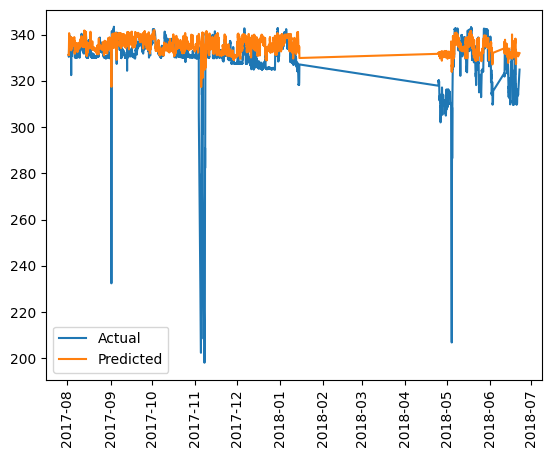

RMSE: 9.606
MAPE: 1.779


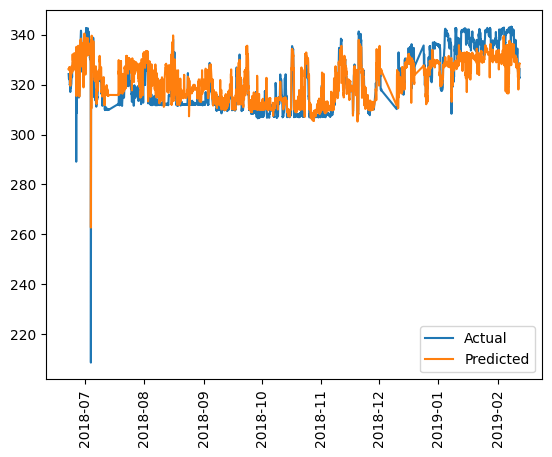

RMSE: 6.328
MAPE: 1.528


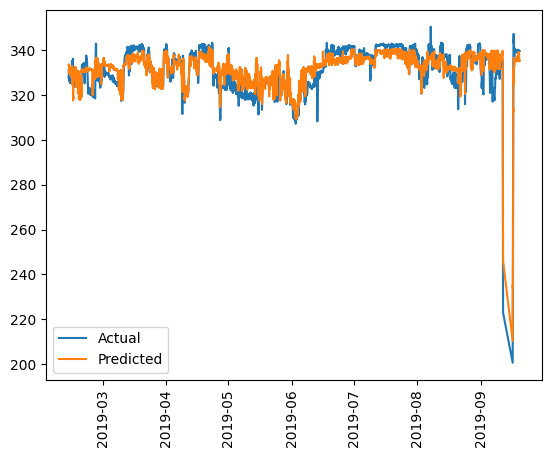

RMSE: 4.965
MAPE: 1.207


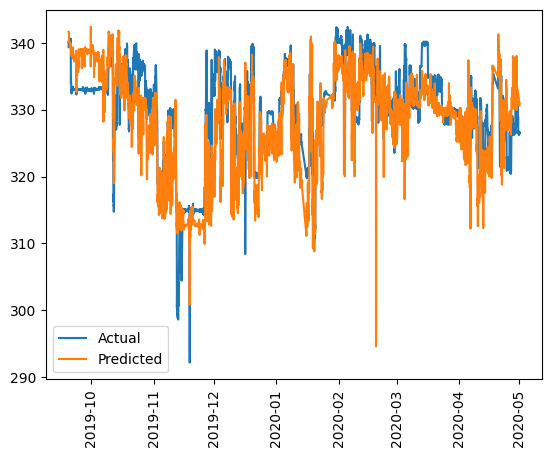

RMSE: 4.982
MAPE: 1.173


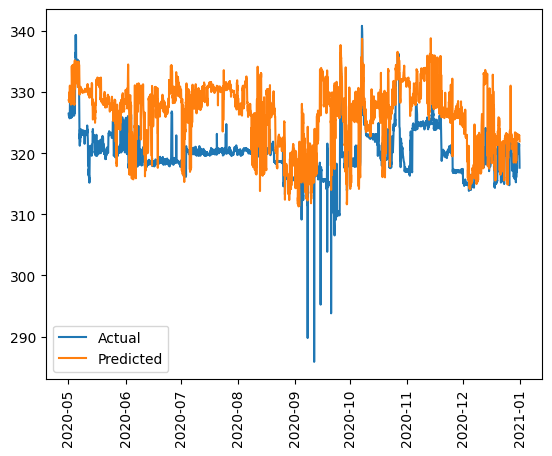

RMSE: 7.963
MAPE: 2.146
Average RMSE: 6.769
Average MAPE: 1.567


In [12]:
cross_val_model(df_c, rf)

In [12]:
rf = RandomForestRegressor(n_estimators = 100, random_state = 0)
rf.fit(train_dfc_x, train_dfc_y)
filename = '../data/rf_furnace_c.pkl'
pickle.dump(rf, open(filename, 'wb'))